# 图像基本操作
- 访问像素值并修改它们 
- 访问图像属性 
- 设置感兴趣区域(ROI) 
- 分割和合并图像
本节中的几乎所有操作都主要与Numpy相关，而不是与OpenCV相关。要使用OpenCV编写更好的优化代码，需要Numpy的丰富知识

In [2]:
import numpy as np
import cv2
img = cv2.imread('./images/messi1.jpg')

## 访问和修改像素值
通过行列坐标访问像素
<br>
对于 BGR 图像，它返回一个由蓝色、绿色和红色值组成的向量。对于灰度图像，只返回相应的灰度

In [2]:
px = img[100, 100]
print(px)
#仅访问蓝色像素
blue = img[100, 100, 0]
print(blue)

[121 100 115]
121


In [3]:
img[100, 100] = [255,255,255]
print(img[100,100])

[255 255 255]


Numpy是用于快速数组计算的优化库。因此，简单地访问每个像素值并对其进行修改将非常缓慢，因此不建议使用。

上面的方法通常用于选择数组的区域，例如前5行和后3列。对于单个像素访问，Numpy数组方法array.item()和array.itemset())被认为更好，但是它们始终返回标量。如果要访问所有B，G，R值，则需要分别调用所有的array.item()。

In [4]:
img.item(10,10,2)

101

In [5]:
img.itemset((10,10,2), 100) #修改红色像素值

In [6]:
img.item(10,10,2)

100

## 访问图像属性
图像属性包括行数，列数和通道数，图像数据类型，像素数等。

- 图像的形状可通过`img.shape`访问。它返回行，列和通道数的元组（如果图像是彩色的）,如果图像是灰度的，则返回的元组仅包含行数和列数，因此这是检查加载的图像是灰度还是彩色的好方法。

In [7]:
print(img.shape)

(800, 1200, 3)


- 像素总数可通过访问`img.size`：

In [8]:
print(img.size)

2880000


- 图像数据类型通过`img.dtype`获得： 
<br>img.dtype在调试时非常重要，因为OpenCV-Python代码中的大量错误是由无效的数据类型引起的。

In [9]:
print(img.dtype)

uint8


## 图像感兴趣区域
使用Numpy索引再次获得ROI

In [10]:
# 复制球 移动到另一个区域
ball = img[ 664:770, 578:698]
img[ 664:770, 746:866] = ball
cv2.imshow('image', img)
if cv2.waitKey(0) == ord('q'):
    cv2.destroyAllWindows()

[![5c67sH.png](https://z3.ax1x.com/2021/10/22/5c67sH.png)](https://imgtu.com/i/5c67sH)

## 拆分合并通道
有时你需要分别处理图像的B，G，R通道。在这种情况下，你需要将BGR图像拆分为单个通道。在其他情况下，你可能需要将这些单独的频道加入BGR图片。你可以通过以下方式简单地做到这一点：

In [11]:
b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))

In [12]:
b = img[:, :, 0]

In [13]:
# 假设你要将所有红色像素都设置为零，则无需先拆分通道。numpy索引更快：
img[:, :, 2] = 0

<b>`cv.split()`是一项耗时的操作（就时间而言）。因此，仅在必要时才这样做。否则请进行Numpy索引。<b>

## 为图像设置边框（填充）
如果要在图像周围创建边框（如相框），则可以使用cv.copyMakeBorder()。但是它在卷积运算，零填充等方面有更多应用。此函数采用以下参数：
- **src** - 输入图像
- **top，bottom，left，right** 边界宽度（以相应方向上的像素数为单位）
- **borderType** - 定义要添加哪种边框的标志。它可以是以下类型：
- **cv.BORDER_CONSTANT** - 添加恒定的彩色边框。该值应作为下一个参数给出。
- **cv.BORDER_REFLECT** - 边框将是边框元素的镜像，如下所示： fedcba | abcdefgh | hgfedcb
- **cv.BORDER_REFLECT_101**或 **cv.BORDER_DEFAULT**与上述相同，但略有变化，例如： gfedcb | abcdefgh | gfedcba
- **cv.BORDER_REPLICATE**最后一个元素被复制，像这样： aaaaaa | abcdefgh | hhhhhhh
- **cv.BORDER_WRAP**难以解释，它看起来像这样： cdefgh | abcdefgh | abcdefg
- **value** -边框的颜色，如果边框类型为**cv.BORDER_CONSTANT**  

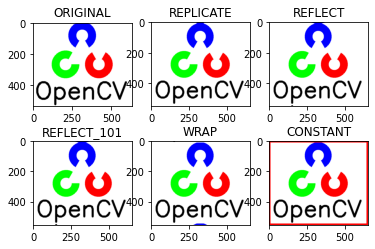

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

BLUE = [255,0,0]
img1 = cv2.imread('./images/logo.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
# 当img1具有形状(M,N,3)或(M,N,4)时，img1中的值被解释为RGB或RGBA值。在这种情况下，将忽略cmap 
# 但是，如果img是形状数组(M,N)，则cmap控制用于显示值的colormap
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL') 
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()